## Лабораторна робота № 5. ІП-14 Бабіч Денис

## Підготовчий етап

### Імпортування модулів

In [306]:
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

### Підготовка літер

In [307]:
PATTERN_D = [ 1,  1, -1,
              1, -1,  1,
              1,  1, -1 ]

PATTERN_E = [ 1,  1,  1,
              1,  1, -1,
              1,  1,  1 ]

PATTERN_N = [ 1, -1,  1,
              1,  1,  1,
              1, -1,  1 ]

PATTERN_A = [ -1,  1, -1,
               1,  1,  1,
               1, -1,  1 ]

PATTERN_E_MISTAKE = [ 1,  1,  1,
                      1, -1, -1,
                      1,  1,  1 ]

PATTERN_A_MISTAKE = [ -1, -1, -1,
                       1,  1,  1,
                       1, -1,  1 ]

EXPECTED_RESULT = [ [ 1, -1, -1, -1],
                    [-1,  1, -1, -1],
                    [-1, -1,  1, -1],
                    [-1, -1, -1,  1] ]

correct_patterns = [PATTERN_D, PATTERN_E, PATTERN_N, PATTERN_A]
incorrect_patterns = [PATTERN_E_MISTAKE, PATTERN_A_MISTAKE]
patterns = correct_patterns + incorrect_patterns

### Допоміжні функції

#### Функція візуалізації літер

In [308]:
def draw_pattern(pattern: list, title: str) -> None:
    _, ax = plt.subplots()
    pattern_array = np.array(pattern).reshape(3, 3)
    plt.imshow(pattern_array, cmap = "binary", vmin = -1, vmax = 1)

    for x in range(3):
        for y in range(3):
            bit_value = pattern_array[y, x]
            color = "white" if bit_value == 1 else "black"
            plt.text(x, y, str(bit_value), color = color, ha = "center", va = "center", fontsize = 20)

    plt.title(title)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

### Функції для моделювання нейронної мережі Хебба

In [309]:
def calculate_weights(number_neurons: int, training_patterns: list, expected_results: list) -> list:
    letters_with_bias = [[1] + pattern for pattern in training_patterns[:number_neurons]]
    weights = np.zeros((number_neurons, len(letters_with_bias[0])))

    for j in range(len(weights)):
        for i in range(len(weights[0])):
            weights[j][i] += sum(letters_with_bias[k][i] * expected_results[j][k] for k in range(len(letters_with_bias)))

    return weights


def calculate_neuron_outputs(neurons_number, patterns, weights):
    return np.array([[1 if sum(w * l for w, l in zip(weights[i], patterns[j])) > 0 else -1 for i in range(neurons_number)] for j in range(len(patterns))])


def train_hebb_network(number_neurons: int, training_patterns: list, expected_results: list) -> list:
    return calculate_weights(number_neurons, training_patterns, expected_results)

## Основний етап

#### Віузалізація вхідних даних

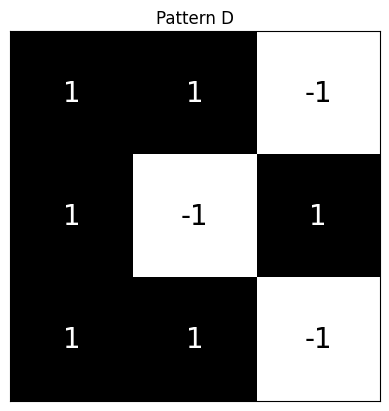

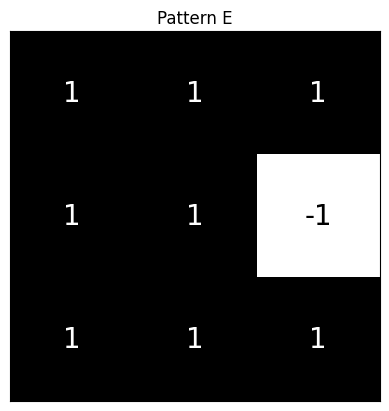

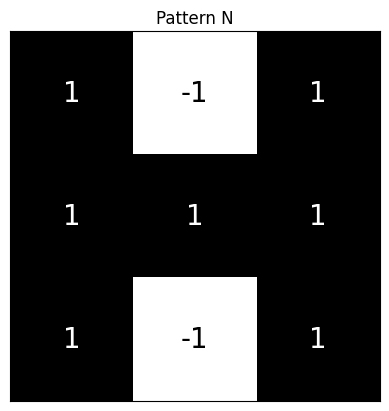

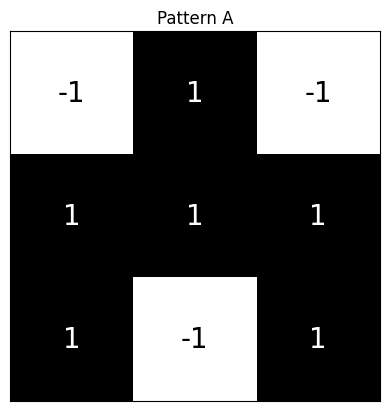

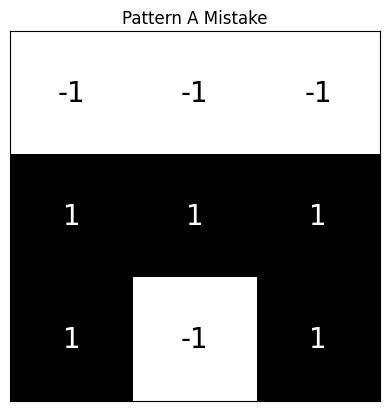

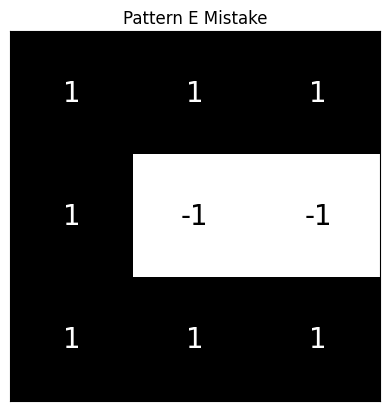

In [310]:
draw_pattern(PATTERN_D, "Pattern D")
draw_pattern(PATTERN_E, "Pattern E")
draw_pattern(PATTERN_N, "Pattern N")
draw_pattern(PATTERN_A, "Pattern A")
draw_pattern(PATTERN_A_MISTAKE, "Pattern A Mistake")
draw_pattern(PATTERN_E_MISTAKE, "Pattern E Mistake")

In [311]:
number_neurons = len(correct_patterns)
result_weights = train_hebb_network(number_neurons, correct_patterns, EXPECTED_RESULT)

print("Weights:\n")

for weights in result_weights:
    print(weights)

print("\n\n")

for i in range(len(patterns)):
    patterns[i] = [1] + patterns[i]

actual_result = calculate_neuron_outputs(number_neurons, patterns, result_weights)

letters = ['\'D\'', '\'E\'', '\'N\'', '\'A\'', "Incorrect \'E\'", "Incorrect \'A\'"]
result_table = [[''] + letters]
result_table.extend([[letters[i]] + list(actual_result[i]) for i in range(len(actual_result))])

print(tabulate(result_table, headers = "firstrow", tablefmt = "fancy_grid"))

Weights:

[-2.  0.  0. -2. -2. -4.  0. -2.  2. -4.]
[-2.  0.  0.  2. -2.  0. -4. -2.  2.  0.]
[-2.  0. -4.  2. -2.  0.  0. -2. -2.  0.]
[-2. -4.  0. -2. -2.  0.  0. -2. -2.  0.]



╒═══════════════╤═══════╤═══════╤═══════╤═══════╕
│               │   'D' │   'E' │   'N' │   'A' │
╞═══════════════╪═══════╪═══════╪═══════╪═══════╡
│ 'D'           │     1 │    -1 │    -1 │    -1 │
├───────────────┼───────┼───────┼───────┼───────┤
│ 'E'           │    -1 │     1 │    -1 │    -1 │
├───────────────┼───────┼───────┼───────┼───────┤
│ 'N'           │    -1 │    -1 │     1 │    -1 │
├───────────────┼───────┼───────┼───────┼───────┤
│ 'A'           │    -1 │    -1 │    -1 │     1 │
├───────────────┼───────┼───────┼───────┼───────┤
│ Incorrect 'E' │    -1 │     1 │    -1 │    -1 │
├───────────────┼───────┼───────┼───────┼───────┤
│ Incorrect 'A' │    -1 │    -1 │    -1 │     1 │
╘═══════════════╧═══════╧═══════╧═══════╧═══════╛
